In [101]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import shutil

In [102]:
#imports for the model
import keras
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten,Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img,img_to_array, ImageDataGenerator

In [103]:
#CNN Model

model= Sequential()

model.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(filters = 36, kernel_size=(3,3),activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.15))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate = 0.15))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 conv2d_29 (Conv2D)          (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 110, 110, 36)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 52, 52, 128)      

In [104]:
model.compile(optimizer='adam', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [105]:
#generating the data
def processImage1(path):
    """
    input: Path
    output: Pre processed image
    """
    image_data = ImageDataGenerator(zoom_range=0.5, shear_range=0.5, rescale=1/255, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image
 

In [106]:
path = "/Users/akshay/Documents/Citeenxe/Cancer_Detection/Many-to-Many/Training"
train_data= processImage1(path)

Found 5712 images belonging to 4 classes.


In [107]:
#generating the data
def processImage2(path):
    """
    input: Path
    output: Pre processed image
    """
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image
 

In [108]:
path = "/Users/akshay/Documents/Citeenxe/Cancer_Detection/Many-to-Many/Testing"
test_data= processImage2(path)

Found 1311 images belonging to 4 classes.


In [109]:
#generating the data
def processImage3(path):
    """
    input: Path
    output: Pre processed image
    """
    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [110]:
path = "/Users/akshay/Documents/Citeenxe/Cancer_Detection/Many-to-Many/Testing"
valid_data= processImage3(path)

Found 1311 images belonging to 4 classes.


In [111]:
#model checkpoint

from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01,patience=6, verbose=1, mode='auto')



mc = ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1, mode='auto',save_best_only=True)

cd = [es,mc]


In [112]:
#model training

hs = model.fit_generator(generator= train_data,
                         steps_per_epoch=8,
                         epochs=30,
                         verbose= 1,
                         validation_data= valid_data,
                         validation_steps=16,
                         callbacks=cd)


/var/folders/s_/_3nm182x4yl7dr0fq2rv72gh0000gn/T/ipykernel_99705/1341147508.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = model.fit_generator(generator= train_data,


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: -81.5425 - accuracy: 0.2188
Epoch 1: val_accuracy improved from -inf to 0.26953, saving model to ./bestmodel.h5
8/8 [==============================] - 27s 4s/step - loss: -81.5425 - accuracy: 0.2188 - val_loss: -531.7008 - val_accuracy: 0.2695
Epoch 2/30


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - ETA: 0s - loss: -3101.8728 - accuracy: 0.2461
Epoch 2: val_accuracy did not improve from 0.26953
8/8 [==============================] - 26s 3s/step - loss: -3101.8728 - accuracy: 0.2461 - val_loss: -13435.4277 - val_accuracy: 0.2188
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: -53985.3633 - accuracy: 0.2188
Epoch 3: val_accuracy did not improve from 0.26953
8/8 [==============================] - 26s 3s/step - loss: -53985.3633 - accuracy: 0.2188 - val_loss: -143704.6250 - val_accuracy: 0.2324
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: -410746.0625 - accuracy: 0.2227
Epoch 4: val_accuracy did not improve from 0.26953
8/8 [==============================] - 25s 3s/step - loss: -410746.0625 - accuracy: 0.2227 - val_loss: -1005650.2500 - val_accuracy: 0.2344
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: -2807076.5000 - accuracy: 0.2188
Epoch 5: val_accuracy did not improve from 0.26953
8/8

In [113]:
#plotting
h= hs.history

h.keys()



dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

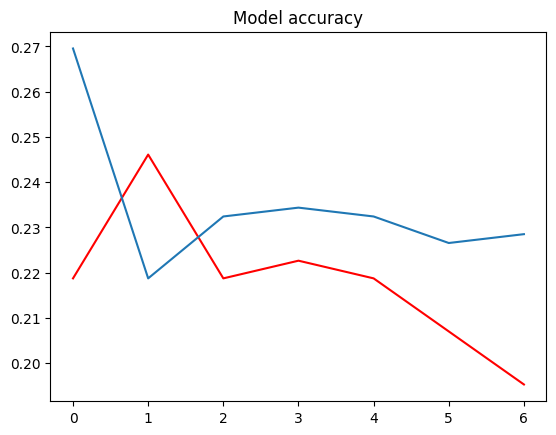

In [114]:
plt.plot(h['accuracy'],c='red')
plt.plot(h['val_accuracy'])
plt.title('Model accuracy')
plt.show()

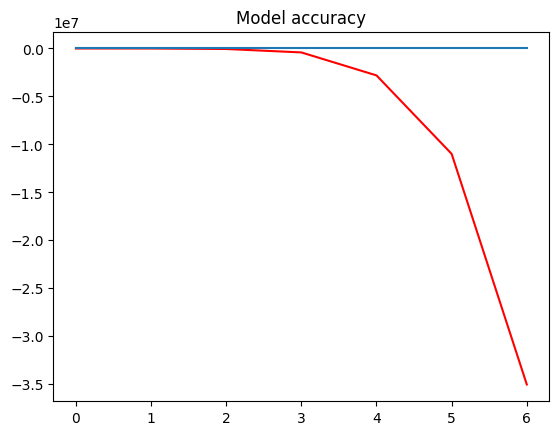

In [115]:
plt.plot(h['loss'],c='red')
plt.plot(h['val_accuracy'])
plt.title('Model accuracy')
plt.show()

In [116]:
from keras.models import load_model

model = load_model("./bestmodel.h5")

In [117]:
acc = model.evaluate_generator(test_data)[1]

print(f"The accuracy of the model is {acc*100} %")

/var/folders/s_/_3nm182x4yl7dr0fq2rv72gh0000gn/T/ipykernel_99705/313557049.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


The accuracy of the model is 23.34096133708954 %


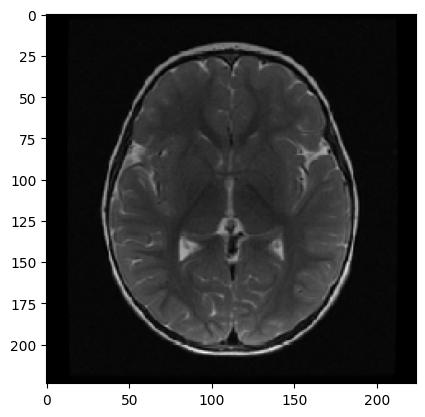

1/1 [==============================] - 0s 101ms/step
There is a brain tumor


In [118]:
#prediction


path="/Users/akshay/Documents/Citeenxe/Cancer_Detection/B-W dataset/no/2 no.jpeg"

img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()


input_arr.shape

input_arr = np.expand_dims(input_arr, axis=0)

pred = np.argmax(model.predict(input_arr), axis=-1)
pred

if pred == [0]:
    print("There is a brain tumor") 
else:
    print("There is no brain tumor")




